In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd 
import pandas as pd

- a)

In [13]:
rnd.seed(42)
data =  os.path.abspath("../Deep_Learning_AI21/Data/train/train")


cats = [str(rnd.randint(0, 1000)) for _ in range(5)]
dogs = [str(rnd.randint(0, 1000)) for _ in range(5)]
cat_dog = cats + dogs



- b)

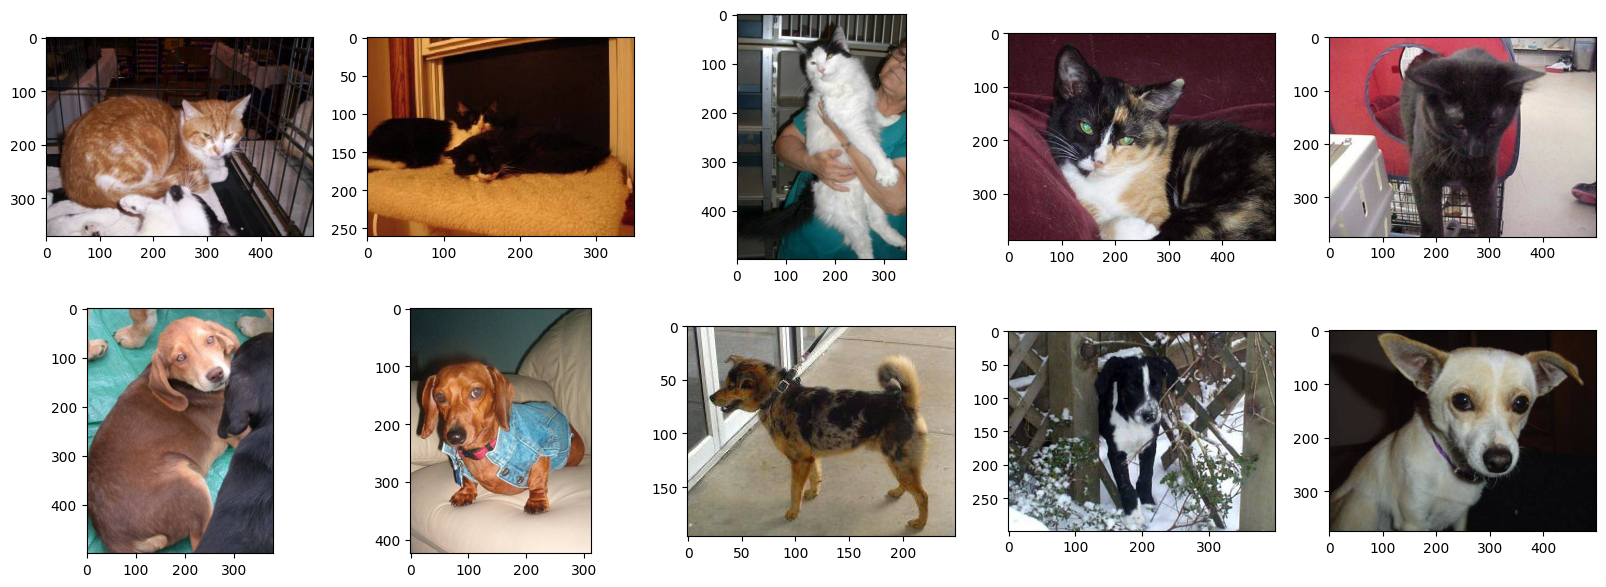

In [14]:

fig, axes = plt.subplots(2, 5, figsize = (20, 7))
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        cat_img = plt.imread(f"{data}\cat.{cat_dog[i]}.jpg")
        ax.imshow(cat_img)
    else:
        dog_img = plt.imread(f"{data}\dog.{cat_dog[i]}.jpg")
        ax.imshow(dog_img)
	
   

- c)

In [15]:
import shutil
first_folder = ["experiment_small_data"]
second_folder = ["train", "test", "val"]
r = rnd.sample(range(12499), 1250)
train = r"./experiment_small_data/train"
test = r"./experiment_small_data/test"
val = r"./experiment_small_data/val"


In [16]:
for i in range(1250):
        cat = f"./data/train/train/cat.{r[i]}.jpg"
        dog = f"./data/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train
        elif i <= 1000:
                end_path = val
        else:
                end_path = test
        shutil.copy(cat, end_path)
        shutil.copy(dog, end_path)

In [17]:
c_train_index = []
d_train_index = []
c_test_index = []
d_test_index = []
c_val_index = []
d_val_index = []

image_numbers = []

## Randoms out 2500 unique images and adds them to a list 
while len(image_numbers) < 2500:
    rand_numbers = [str(rnd.randint(0, 12499)) for _ in range(2500 - len(image_numbers))]
    [image_numbers.append(item) for item in rand_numbers if item not in image_numbers]

## Creats smaller lists from the above created list
for i, item in enumerate(image_numbers):
    if i < 800:
        c_train_index.append(item)

    if i >= 800 and i < 1600:
        d_train_index.append(item)

    if i >= 1600 and i < 1800:
        c_test_index.append(item)

    if i >= 1800 and i < 2000:
        d_test_index.append(item)

    if i >= 2000 and i < 2250:
        c_val_index.append(item)

    if i >= 2250:
        d_val_index.append(item)    
    

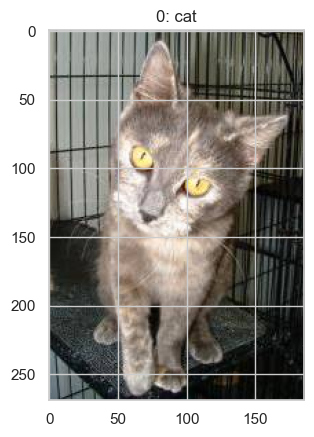

In [51]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

def images_labels(images):
    files = os.listdir(images)
    random.shuffle(files)
    
    labels = [i[:3] for i in files]
    encoded_labels = np.array([0 if label == "cat" else 1 for label in labels])
    
    images = [plt.imread(os.path.join(images, item)) for item in files]
    
    return images, encoded_labels, labels

def display_image(image, label, encoded_label):
    plt.imshow(image)
    plt.title(f"{encoded_label}: {label}")
    plt.show()


train_dir = './experiment_small_data/train'

X_train_val_imgs, y_train_val, y_train_val_labels = load_images_and_labels(train_dir)


display_image(X_train_val_imgs[0], y_train_val_labels[0], y_train_val[0])


In [54]:
def load_data(dir):
    files = os.listdir(dir)
    rnd.shuffle(files)
    
    labels = [i[:3] for i in files]
    encoded_labels = np.array([0 if label == "cat" else 1 for label in labels])
    
    images = [plt.imread(os.path.join(dir, item)) for item in files]
    
    return images, encoded_labels, labels

val_dir = './experiment_small_data/val'
test_dir = './experiment_small_data/test'

X_val_imgs, y_val, y_val_labels = load_data(val_dir)
X_test_imgs, y_test, y_test_labels = load_data(test_dir)

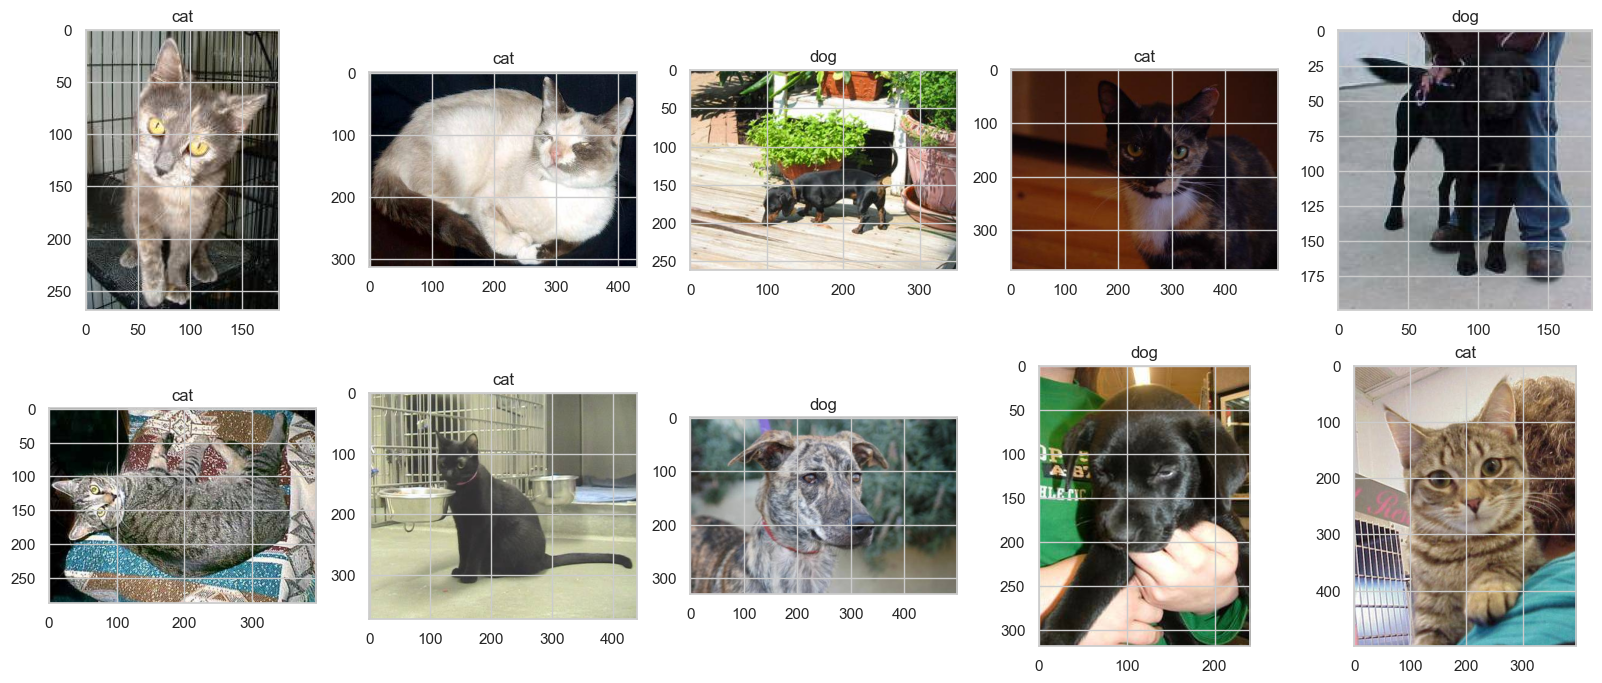

In [55]:
def images_labels(images, labels, title=''):
     

    fig, axes = plt.subplots(2,5, figsize = (20,8))

    for i, ax in enumerate(axes.flatten()):
        
            ax.imshow(images[i])
            ax.set(title=f"{title}{labels[i]}")
        

images_labels(X_train_val_imgs, y_train_val_labels)


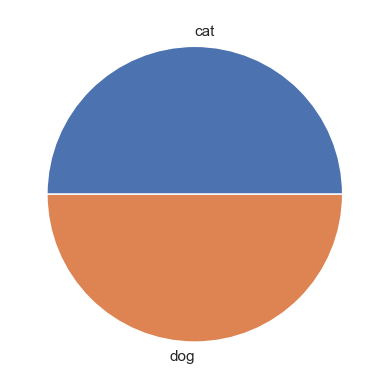

In [56]:
# try to make pie with result
from collections import Counter

def pie_chart_of_labels(y_train_val_labels):
    label_counts = Counter(y_train_val_labels)
    
    
    plt.pie(label_counts.values(), labels=label_counts.keys())
    
    plt.show()


pie_chart_of_labels(y_train_val_labels)


<Axes: >

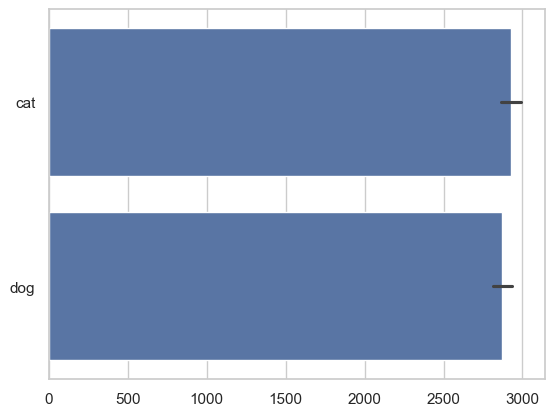

In [57]:
sns.barplot(y_train_val_labels)

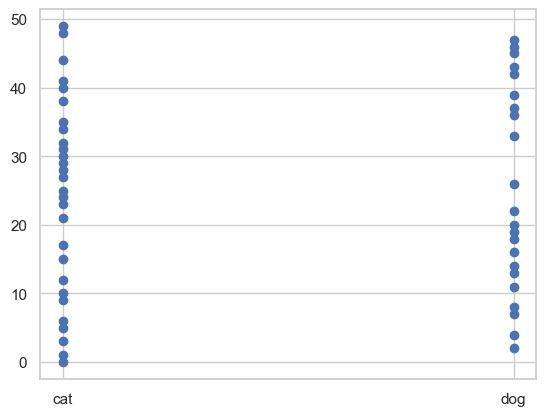

In [58]:

plot_list = []
x=0
for i in range(50):
    plot_list.append(x)
    x+=1
plt.scatter(x = y_train_val_labels[0:50], y = plot_list)

1.a.

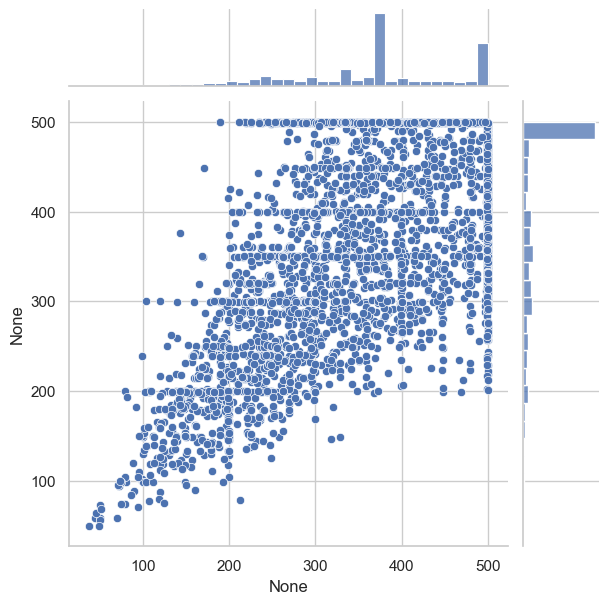

In [59]:
dir = './experiment_small_data/train/'
X_shape = []
y_shape = []

#https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
for i in X_train_val_imgs:
    X_shape.append(i.shape[0])
    y_shape.append(i.shape[1])

sns.jointplot(x = X_shape, y = y_shape)

1.b.

In [60]:
# 150x150: These sizes are often chosen for applications where computational resources are limited. 
# Smaller images reduce the number of parameters in the model

import cv2
re_X_train = []
re_X_val = []
re_X_test = []

for i in range(len(X_train)):
    re_X_train.append(cv2.resize(X_train[i], resize))

for i in range(len(X_val)):
    re_X_val.append(cv2.resize(X_val[i], resize))

ModuleNotFoundError: No module named 'cv2'